<a href="https://colab.research.google.com/github/DharmeshRV/Book-Recommendation-System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - Book Recommendation System**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name -** Dharmesh Kumar

# **Project Summary -**

Recommender systems are used since last few decades but with the rapid digitalization - where books, news, movies, clothes and even food and grocery are available online - the recommender systems have become necessary devices in attracting the customers and helping them find the products of thier interest. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to user the right content, marhcing thier preferences) recommender systems today are unavoidable in our daily online journeys.

**1. Stating the Problem**

* Understanding the Problem
* Understanding the variables in data

**2. Data Wrangling**

* Filling the Missing Values
* Processing 'Location' values
* Merging the Dataframes
* Checking for Duplicated values

**3. Exploratory Data Analysis**
* Exploring Popular Authors, Publishers and Best-seller Books
* Visualizing Countries
* Understanding the Rating Distribution

**4. Recommendation Systems Implementation**
* Memory-Based Recommendation Systems
   * Popularity Based Recommendation System
   * Item-Based Recommendation System
* Model-Based Recommendation System
   * User-based Collaborative Filtering Recommender
   * Model Evaluation

**5. Conclusions**

# **GitHub Link -**

https://github.com/DharmeshRV/Book-Recommendation-System

# **Problem Statement**


In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items  being movies to watch, text to read, products to buy or anything else depending on industries).

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.

**Content**

The Book dataset contains 3 files.


● Books

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

● Ratings

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

● Users

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from scipy.sparse.linalg import svds
import random
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading Book data
books_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter_Data Science/Capstone Projects/Book Recommendation System - Dharmesh Kumar/Books.csv')
ratings_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter_Data Science/Capstone Projects/Book Recommendation System - Dharmesh Kumar/Ratings.csv')
users_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Almabetter_Data Science/Capstone Projects/Book Recommendation System - Dharmesh Kumar/Users.csv')

### Dataset First View

In [4]:
# Books Dataset First Look
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
# Ratings Dataset First Look
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
# Users Dataset First Look
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print('Shape of books dataset is:',books_df.shape,'\nShape of ratings dataset is:',ratings_df.shape,
      '\nShape of user dataset is:',users_df.shape)

Shape of books dataset is: (271360, 8) 
Shape of ratings dataset is: (1149780, 3) 
Shape of user dataset is: (278858, 3)


### Dataset Information

In [8]:
# Books Dataset Info
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [9]:
# Ratings Dataset info
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [10]:
# Users Dataset info
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### Duplicate Values

In [11]:
# Dataset Duplicate Value Count
print('Duplicate rows in Books dataset are:',books_df.duplicated().sum(),
      '\nDuplicate rows in ratings dataset are:',ratings_df.duplicated().sum(),
      '\nDuplicate rows in users dataset are:',users_df.duplicated().sum())

Duplicate rows in Books dataset are: 0 
Duplicate rows in ratings dataset are: 0 
Duplicate rows in users dataset are: 0


#### Missing Values/Null Values

In [12]:
# Missing Values/Null Values Count
print('Missing Values in Books dataset are:\n',books_df.isna().sum(),
      '\n\nMissing Values in ratings dataset are:\n',ratings_df.isna().sum(),
      '\n\nMissing Values in users dataset are:\n',users_df.isna().sum())

Missing Values in Books dataset are:
 ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64 

Missing Values in ratings dataset are:
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64 

Missing Values in users dataset are:
 User-ID          0
Location         0
Age         110762
dtype: int64


Text(0.5, 1.0, ' Visualising Missing Values')

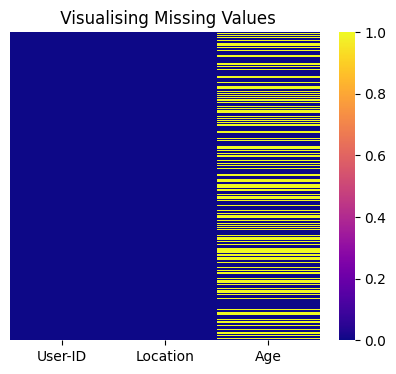

In [13]:
# Visualizing the missing values in users dataset

plt.figure(figsize=(5,4))
sns.heatmap(users_df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

### What did you know about your dataset?

Using the given data we are going to develop a recommender system which would accurately give book recommendation to the users.

Books dataset has information of books in 271360 rows and 8 columns. 1 author, 2 publishers and 3 L-image-url are missing. There are no duplicated rows in the dataset.

Ratings dataset contains the book rating information in 1149780 rows and 3 columns. The dataset has no missing or duplicate value.

Users dataset contains the users info. in 278858 rows and 3 columns. The age column has 110762 many (39.7%) null values with no duplicated rows in the dataset.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
print('Columns in books dataset are:\n',books_df.columns,
      '\n\nColumns in ratings dataset are:\n',ratings_df.columns,
      '\n\nColumns in users dataset are:\n',users_df.columns)

Columns in books dataset are:
 Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object') 

Columns in ratings dataset are:
 Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object') 

Columns in users dataset are:
 Index(['User-ID', 'Location', 'Age'], dtype='object')


In [15]:
# Books Dataset Describe
books_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [16]:
# Ratings Dataset Describe
ratings_df.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


Here, in Book_Rating column 50% ratings are 0 i.e., implicitly rated books. So, we need to extract explicit ratings for better results.

In [17]:
# Users Dataset Describe
users_df.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


There are outliers in the age column as the min. age is 0 and max. age is 244 years.

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable in books dataset.
print(books_df.shape,'\n')
books_df.nunique()

(271360, 8) 



ISBN                   271360
Book-Title             242135
Book-Author            102023
Year-Of-Publication       202
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64

Unique values in ISBN are more than that in Book-Title. This means some titles have multiple ISBNs because the year of release (revised editions),versions or publishing companies may be different. I'll drop the duplicated titles later if their users and ratings are same.

In [19]:
# Check Unique Values for each variable in ratings dataset.
print(ratings_df.shape,'\n')
ratings_df.nunique()

(1149780, 3) 



User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64

In [20]:
# Check Unique Values for each variable in users dataset.
print(users_df.shape,'\n')
users_df.nunique()

(278858, 3) 



User-ID     278858
Location     57339
Age            165
dtype: int64

## ***3. Data Wrangling***

### Renaming the Columns

In [21]:
# Write your code to make your dataset analysis ready.

# first I rename the columns in the dataframes 
books_df.rename(columns={'ISBN':'isbn','Book-Title':'title','Book-Author':'author','Publisher':'publisher','Image-URL-M':'image_url_m',
                         'Image-URL-L':'image_url_l'},inplace=True)

ratings_df.rename(columns={'User-ID':'user_id','ISBN':'isbn','Book-Rating':'rating'},inplace=True)

users_df.rename(columns={'User-ID':'user_id'},inplace=True)

###Filling the Missing Values in 'author' and 'publisher' Columns 

In [22]:
# Checking the missing book-author
books_df[books_df['author'].isna()]


,isbn,title,author,Year-Of-Publication,publisher,Image-URL-S,image_url_m,image_url_l
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [23]:
# Filling the null value
books_df.loc[187689, 'author'] = 'Larissa Anne Downes'

In [24]:
# Finding missing Publishers
books_df[books_df['publisher'].isna()]

,isbn,title,author,Year-Of-Publication,publisher,Image-URL-S,image_url_m,image_url_l
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [25]:
# Replacing NaNs with publisher names
books_df.loc[128890, 'publisher'] = 'NovelBooks, Inc'
books_df.loc[129037, 'publisher'] = 'NovelBooks, Inc'

### Getting the Country names of the Users

In [26]:
# Extracting the country names from users_df
for i in users_df:
    users_df['country']=users_df.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [27]:
# Displaying the country names
print(set(users_df['country']))

{'', nan, 'maroc', 'ussurfing', 'l', 'pasco', 'colombia', 'isreal', 'moldova', 'queenspark', 'id', 'toscana', 'ghana', 'hennipen', 'diy', 'a', 'monaco', 'west yorkshire', 'phila', 'germay', 'pr', 'europa', 'vicenza', 'north carolina', 'mauritius', 'milano', 'kyrgyzstan', 'alachua', 'pakistan', 'le madagascar', 'jordan', 'bangladesh', 'vietnam', 'argentina', 'harvatija', 'bell', 'kiribati', 'essex', 'el salvador', 'mongolia', 'fiji', 'xxxxxx', 'croatia', 'egypt', 'input error', 'tonga', 'autralia', 'lornsenland', 'chad', 'costa rica', 'galiza', 'puerto rico', 'wales', 'togo', 'qatar', 'china', 'sicilia', 'madagascar', 'yemen', 'ust', 'south korea', 'rutherford', 'united staes', 'yugoslavia', 'shelby', 'hampden', 'san marino', 'east africa', 'angola', 'palau', 'belgique', 'korea', 'saint luica', 'oman', 'saint lucia', 'indonesia', 'turkmenistan', 'buncombe', 'alderney', 'italy', 'clackamas', 'nyc', 'granville', 'japan', 'pender', 'guinea', 'benin', 'monroe', 'basque country', 'philippini

In [28]:
# Correcting the misspelled country names

users_df.loc[users_df['country'].isin(['australii','autralia','western australia']), 'country'] = 'Australia'

users_df.loc[users_df['country'].isin(['texas','oakland','nyc','ohio','north carolina','houston','unite states','yanhill','united sates',
                                       'united staes','united state','united statea','united stated','america','united stated of america',
                                       'jersey','united states','united states of america','us','us of a','us virgin islands','usa  canada',
                                       'usa currently living in england','uusa','usaa','wonderful usa','california','orange co','ysa']), 'country'] = 'USA'

users_df.loc[users_df['country'].isin(['the netherlands','nederlands','netherlands','netherlands antilles','neverland','nl']),'country'] = 'netherlands'

users_df.loc[users_df['country'].isin(['in','india','indiai']),'country'] = 'India'

users_df.loc[users_df['country'].isin(['europa','europe']),'country'] = 'europe'

users_df.loc[users_df['country'].isin(['can','canada','canada eh','cananda','canda','le canada','il canada']),'country'] = 'canada'

users_df.loc[users_df['country'].isin(['geermany','germany','germay','deutsches reich','deutschland']),'country'] = 'germany'   

users_df.loc[users_df['country'].isin(['northern ireland','new london','london','england','england uk','english','united kindgdom',
                                       'united kindgonm','worcester','united kingdom','u k','west yorkshire','wales']), 'country'] = 'UK' 

users_df.loc[users_df['country'].isin(['the philippines','philippines','philippinies','phillipines','phils','phippines']),'country']='Philippines' 

users_df.loc[users_df['country'].isin(['l','1','k1c7b1','01776','02458','19104','23232','30064','85021','87510','','xxxxxx','universe','nowhere',
                                       
                                       'x','y','a','the','unknown',np.nan,'n/a','aaa','z','somewherein space']), 'country'] = 'others'

users_df.loc[users_df['country'].isin([ 'italia','italien','itlay','italy']), 'country'] = 'Italy'

users_df.loc[users_df['country'].isin(['xinyu','prc','china','china öð¹ú','öð¹ú','chinaöð¹ú','chian','zhengjiang','yunling']), 'country'] = 'China'

users_df['country'].replace(['rsa','urugua','ukrain','turkei','türkiye','niger','nz','newzealand','moçambique','la belgique','la argentina','isreal','fifi',
                             'le madagascar','la france','the gambia','the netherlands','srilanka','saudia arabia','brasil','_ brasil','malaysian',
                             'hongkong','russian federation'], ['south africa','uruguay','ukraine','turkey','turkey','nigeria','new zealand','new zealand','mozambique',
                                                                'Belgium','argentina','israel','fiji','madagascar','france','gambia','netherlands',
                                                                'sri lanka','saudi arabia','brazil','brazil','malaysia','hong kong','russia'],inplace=True)
 


In [29]:
# Converting the country names to uppercase
users_df['country']=users_df['country'].str.upper()

# Dropping the 'Location' column
users_df.drop('Location',axis=1,inplace=True)

In [30]:
# Let's see the contry names
print(users_df['country'].unique())

['USA' 'RUSSIA' 'PORTUGAL' 'UK' 'CANADA' 'SPAIN' 'AUSTRALIA' 'BRAZIL'
 'OTHERS' 'GERMANY' 'MEXICO' 'CHINA' 'ITALY' 'DISTRITO FEDERAL' 'FRANCE'
 'NETHERLANDS' 'IRAQ' 'FINLAND' 'NEW ZEALAND' 'INDIA' 'GHANA'
 'SWITZERLAND' 'SLOVENIA' 'IRAN' 'PERU' 'VIETNAM' 'SRI LANKA' 'PAKISTAN'
 'DENMARK' 'BELGIUM' 'MALAYSIA' 'TURKEY' 'PHILIPPINES' 'GREECE' 'COLOMBIA'
 'NORWAY' 'KUWAIT' 'CHILE' 'QUIT' 'LJ' 'TAIWAN' 'ESPAÑA' 'SWEDEN'
 'ARGENTINA' 'NIGERIA' 'BULGARIA' 'AUSTRIA' 'ROMANIA' 'SINGAPORE'
 'ALBANIA' 'EGYPT' 'TUNISIA' 'UZBEKISTAN' 'QATAR' 'SYRIA' 'SAUDI ARABIA'
 'INDONESIA' 'SUDAN' 'POLAND' 'THAILAND' 'IRELAND' 'VENEZUELA' 'PARAGUAY'
 'MOZAMBIQUE' 'MOROCCO' 'AFGHANISTAN' 'ESTONIA' 'CLACKAMAS' 'LESOTHO'
 'YUGOSLAVIA' 'SLOVAKIA' 'COSTA RICA' 'BASQUE COUNTRY' 'ETHIOPIA'
 'CROATIA' 'ISRAEL' 'JAPAN' 'ICELAND' 'SOUTH AFRICA' 'CUBA' 'CALABRIA'
 'ALDERNEY' 'PUERTO RICO' 'HONG KONG' 'LATVIA' 'LUXEMBOURG' 'BELARUS'
 'CAPE VERDE' 'LITHUANIA' 'GUYANA' 'SCOTLAND' 'JORDAN' 'ANGOLA' 'ALGERIA'
 'ANDORRA' 'KYRGY

###Merging the Dataframes

First, books_df and ratings_df are merged on 'isbn' column then this dataframe is merged to users_df on 'user_id' column.

In [31]:
# Uppercasing the ISBN numbers
books_df['isbn']=books_df['isbn'].str.upper()
ratings_df['isbn']=ratings_df['isbn'].str.upper()

In [32]:
# Now retaining explicit ratings only
ratings_df = ratings_df[ratings_df['rating']!=0]

In [33]:
# Merging books_df and ratings_df
book_rating_df = pd.merge(books_df, ratings_df, on = 'isbn')

# Merging book_rating_df and users_df
df = pd.merge(book_rating_df, users_df, on = 'user_id')

In [34]:
# Shape of the new dataframe
df.shape

(389342, 12)

In [35]:
# Let's see what the dataframe looks like
df.head()

,isbn,title,author,Year-Of-Publication,publisher,Image-URL-S,image_url_m,image_url_l,user_id,rating,Age,country
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8,5,NaN,CANADA
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,8,5,NaN,CANADA
2,0887841740,The Middle Stories,Sheila Heti,2004,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,http://images.amazon.com/images/P/0887841740.0...,8,5,NaN,CANADA
3,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,http://images.amazon.com/images/P/1552041778.0...,8,5,NaN,CANADA
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.0...,http://images.amazon.com/images/P/1567407781.0...,http://images.amazon.com/images/P/1567407781.0...,8,6,NaN,CANADA


In [36]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389342 entries, 0 to 389341
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   isbn                 389342 non-null  object 
 1   title                389342 non-null  object 
 2   author               389342 non-null  object 
 3   Year-Of-Publication  389342 non-null  object 
 4   publisher            389342 non-null  object 
 5   Image-URL-S          389342 non-null  object 
 6   image_url_m          389342 non-null  object 
 7   image_url_l          389341 non-null  object 
 8   user_id              389342 non-null  int64  
 9   rating               389342 non-null  int64  
 10  Age                  273295 non-null  float64
 11  country              389342 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 38.6+ MB


In [37]:
# Number of unique values in the columns
for i in df.columns:
  print('Unique values in',i,'are:',df[i].nunique())

Unique values in isbn are: 149717
Unique values in title are: 135568
Unique values in author are: 62114
Unique values in Year-Of-Publication are: 181
Unique values in publisher are: 11575
Unique values in Image-URL-S are: 149716
Unique values in image_url_m are: 149716
Unique values in image_url_l are: 149715
Unique values in user_id are: 68091
Unique values in rating are: 10
Unique values in Age are: 132
Unique values in country are: 176


###Dropping Duplicated Rows

In [38]:
# Getting the rows where 'title', 'author', 'user_id' and 'rating' values are duplicated
df[['title','author','user_id','rating']].duplicated().sum()

5894

In [39]:
# Dropping these duplicated rows
df = df.drop_duplicates(subset = ['title','author','user_id','rating'], keep = 'first').reset_index(drop = True)

In [40]:
'''
Here I am retaining only important columns and
dropping 'Year-Of-Publication', 'Image-URL-S', Image-URL-L', and 'age' ones.
'''
df = df[['isbn', 'title', 'author', 'publisher', 'image_url_m', 'user_id', 'rating', 'country']]
df.head()

,isbn,title,author,publisher,image_url_m,user_id,rating,country
0,0002005018,Clara Callan,Richard Bruce Wright,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5,CANADA
1,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,Scribner,http://images.amazon.com/images/P/074322678X.0...,8,5,CANADA
2,0887841740,The Middle Stories,Sheila Heti,House of Anansi Press,http://images.amazon.com/images/P/0887841740.0...,8,5,CANADA
3,1552041778,Jane Doe,R. J. Kaiser,Mira Books,http://images.amazon.com/images/P/1552041778.0...,8,5,CANADA
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,Brilliance Audio - Trade,http://images.amazon.com/images/P/1567407781.0...,8,6,CANADA


### What all manipulations have you done and insights you found?

First I renamed some of the columns to easy-to-use names and filled the missing values in 'author' and 'publisher' columns as there were only 1 and 2 null values.

Then I fetched the countries of the users, corrected the spellings and grouped some of the locations in respective countries.

Further, I merged the books dataframe with ratings retaining explicit ratings only and then merged it with the users data.

Some of the titles had multiple ISBNs. So, next I got the rows where 'title', 'author', 'user_id' and 'rating' values are duplicated and dropped them.

I also dropped not-so-useful columns such as 'Year-Of-Publication', 'Image-URL-S', 'image_url_l' as well as 'Age' because it had a lot of null values.



## ***4. Data Visualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Bar Chart to Visualize Popular Authors

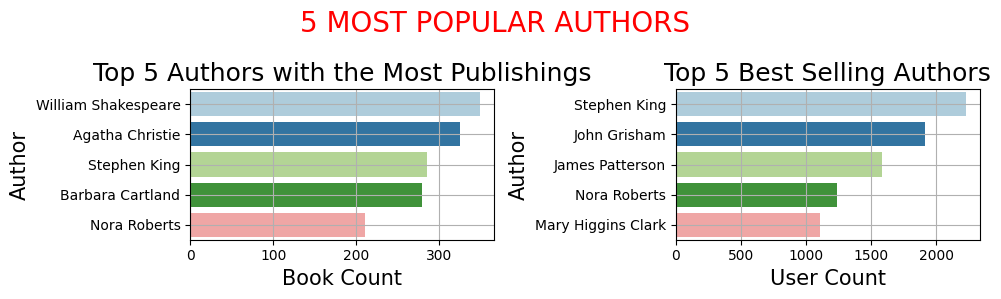

In [41]:
# Chart - 1 visualization code
# Popular Authors in the dataset
fig=plt.figure(figsize=(10,3))
# Authors with the most number of  books 
plt.subplot(1,2,1)
plt.suptitle("5 MOST POPULAR AUTHORS", color='red' ,fontsize=20)
popular_authors=df.groupby('author')['title'].nunique().nlargest(5)
sns.barplot(x=popular_authors.values,y=popular_authors.index,palette='Paired')
plt.title('Top 5 Authors with the Most Publishings',fontsize=18)
plt.xlabel('Book Count',fontsize=15)
plt.ylabel('Author',fontsize=15)
plt.grid(True)

# Best selling authors
plt.subplot(1,2,2)
best_selling_authors=df.groupby('author')['user_id'].nunique().nlargest(5)
sns.barplot(x=best_selling_authors.values,y=best_selling_authors.index,palette='Paired')
plt.title('Top 5 Best Selling Authors',fontsize=18)
plt.xlabel('User Count',fontsize=15)
plt.ylabel('Author',fontsize=15)
plt.tight_layout()
plt.grid(True)

##### 1. Why did you pick the specific chart?

A bar chart represents categories by bars with heights or lengths proportional to the values that they represent. It also shows comparisons among discrete categories.

##### 2. What is/are the insight(s) found from the chart?

First plot showes that William Shakespeare has most number of titles listed in the dataset followed by Agatha Christie.

The second plot showes the most number of ratings earned by authors and Stephen King aced it with more than 2000 ratings

#### Chart - 2 Bar Chart to Visualize Best Seller-Books

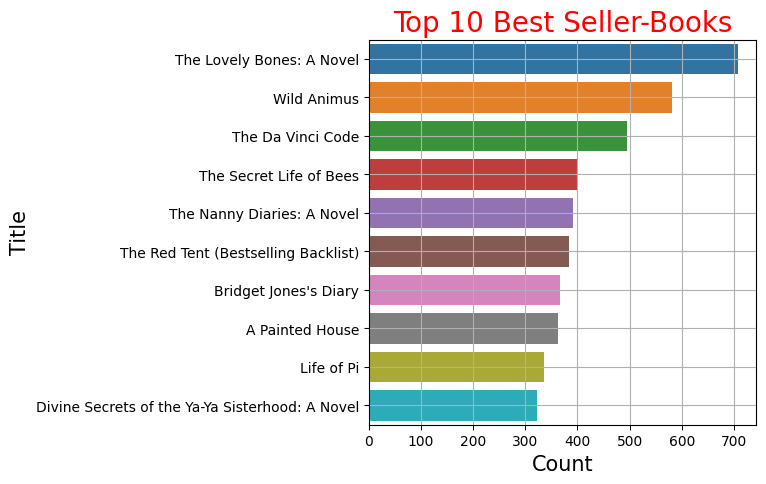

In [42]:
# Chart - 2 visualization code
# Best selling books 
plt.figure(figsize=(5,5))
best_sellers=df.groupby('title')['user_id'].nunique().nlargest(10)
sns.barplot(x=best_sellers.values,y=best_sellers.index)
plt.title('Top 10 Best Seller-Books', color='red', fontsize=20)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Title',fontsize=15)
plt.grid(True)

##### 1. Why did you pick the specific chart?

A bar chart represents categories by bars with heights or lengths proportional to the values that they represent. It also shows comparisons among discrete categories.

##### 2. What is/are the insight(s) found from the chart?

The plot showes the number of users for popular books and 'The Lovely Bones: A Novel' attracts the most number of ratings which is more than 700 followed by 'Wild Animus'.

#### Chart - 3 Plotting Popular Publishers

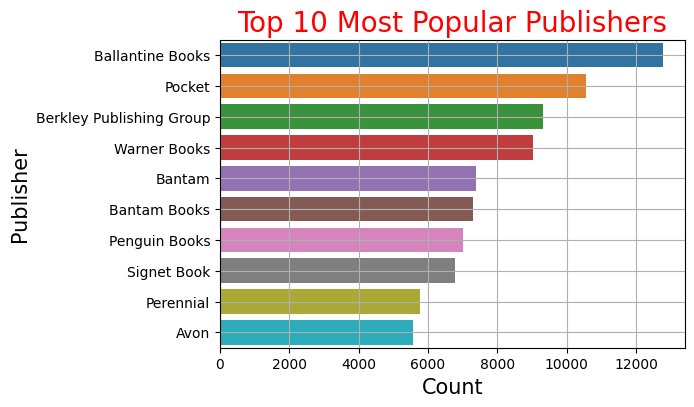

In [43]:
# Chart - 3 visualization code
# Most Popular Publishers
plt.figure(figsize=(6,4))
popular_publishers=df.groupby('publisher')['title'].count().nlargest(10)
sns.barplot(x=popular_publishers.values,y=popular_publishers.index)
plt.title('Top 10 Most Popular Publishers', color='red', fontsize=20)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Publisher',fontsize=15)
plt.grid(True)

##### 1. Why did you pick the specific chart?

A bar chart represents categories by bars with heights or lengths proportional to the values that they represent. It also shows comparisons among discrete categories.

##### 2. What is/are the insight(s) found from the chart?

In the above bar chart showing number of books published by the publishers Ballantine Books is on the top with more than 12000 books followed by Pocket.

#### Chart - 4 Bar plot showing top Countries

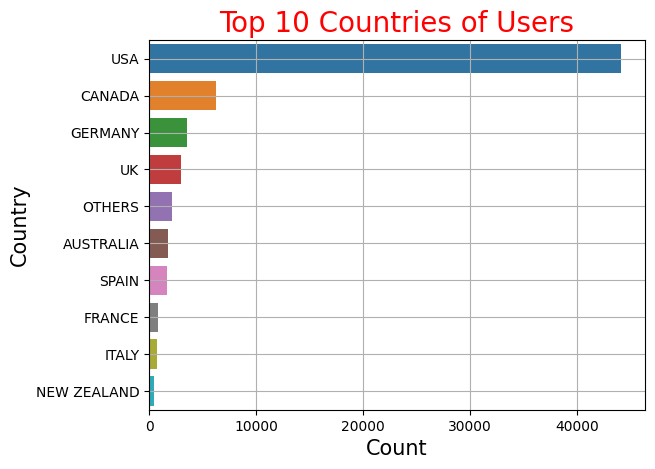

In [44]:
# Chart - 4 visualization code: Countries with number of users

country=df.groupby('country')['user_id'].nunique().nlargest(10)
sns.barplot(x=country.values,y=country.index)
plt.title('Top 10 Countries of Users', color='red',fontsize=20)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Country',fontsize=15)
plt.grid(True)

##### 1. Why did you pick the specific chart?

A bar chart represents categories by bars with heights or lengths proportional to the values that they represent. It also shows comparisons among discrete categories.

##### 2. What is/are the insight(s) found from the chart?

From the above bar chart we can deduce that most of the users hail from the USA. And Canada is at second place.

#### Chart - 5 Distribution Plot for Rating

In [45]:
# Counting the Values in rating column
df['rating'].value_counts()

8     91730
10    71058
7     66376
9     60728
5     45284
6     31686
4      7613
3      5117
2      2375
1      1481
Name: rating, dtype: int64

For explicit ratings, 8 is the most common rating followed by 10.

Text(0, 0.5, 'Density')

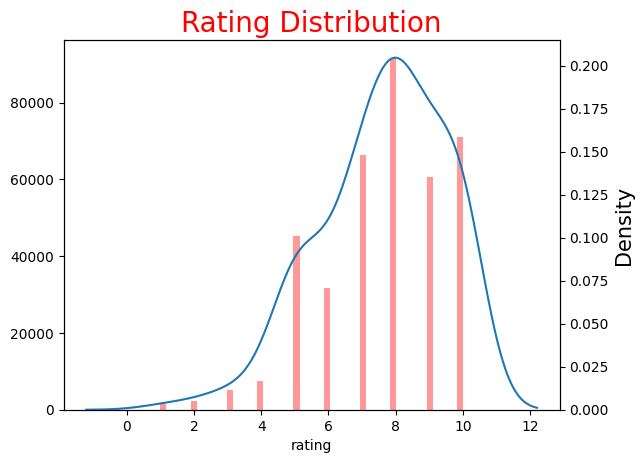

In [46]:
# Chart - 5 visualization code
# Distribution of Ratings
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

sns.distplot(df['rating'], kde=False, ax=ax1, color='red')
sns.distplot(df['rating'], hist=False, ax=ax2, kde_kws={'bw':0.4})
plt.title('Rating Distribution', color='red', fontsize=20)
plt.xlabel('Ratings',fontsize=15)
plt.ylabel('Density',fontsize=15)

##### 1. Why did you pick the specific chart?

Distribution plot visually assesses the distribution of data and expresses the pattern according to which the values are distributed. We generally use a histogram or distribution plot to understand the pattern.

##### 2. What is/are the insight(s) found from the chart?

The rating distribution comes out to be negatively skewed as higher ratings are more frequent in the dataset.

#### Chart - 6 Word Cloud Representing Words in the Title

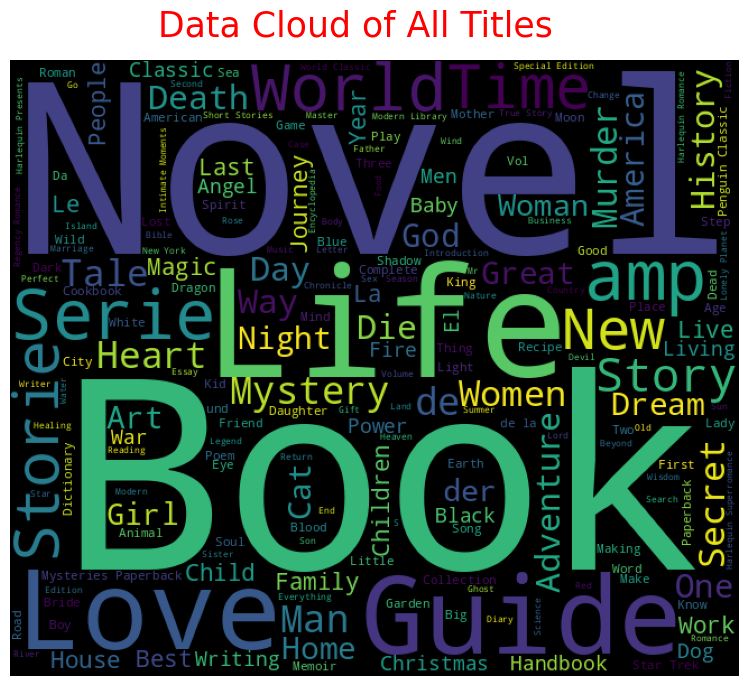

In [47]:
# Chart - 6 visualization code: WordCloud
titles = df['title'].unique()

plt.subplots(figsize=(15,8))
wordcloud = WordCloud(background_color='#000', width=650, height=550,
                      stopwords=STOPWORDS,).generate(" ".join(titles))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.figtext(.5,.91,'Data Cloud of All Titles', color='red', fontsize=25, ha='center')
plt.show()

##### 1. Why did you pick the specific chart?

Word Clouds are visual representations of words that give greater prominence to words that appear more frequently

##### 2. What is/are the insight(s) found from the chart?

Clearly, 'Book', 'Novel', 'Life' etc. are the most frequent words in the dataset. And important terms also affect the recommendations.

## ***5. Recommendation Systems Implementation***

Collaborative filtering makes automatic predictions about the interests of a user by collecting preferences or taste information from many users.

Content-Based filtering uses only information about the description and attributes of the items user has previously consumed to model user's preferences.

Since item description and information like genre etc. are not available so we can not guess the content only from title of the book as sometimes titles are ambiguous. So I am using Collaborative filtering model.



### **1. Memory-Based Recommendation Systems**

This approach uses the memory of previous users interactions to compute user (or item) similarities based on based items they have interacted.

#### **1. Popularity Based Recommendation System**

This recommender gives the trending items for all the users without considering their preferecnes.

In [48]:
# Code to create a Class of Popularity Based Recommendation System

class PopularRecommender:
    
  def __init__(self, df):
    #Creating attributes
    self.df = df
        
  # Code to create a method of the class that gets the  recommendations    
  def popular_books(self, df, n=10):

    '''
    This method takes books-ratings-users dataframe and no. of books (default = 10) to be returned as arguments and returns a 
    dataframe of recommended books with columns 'isbn', 'title', 'author', 'image_url_m', 'num_of_votes', 'average_ratings', and 'popularity'
    '''
    # Counting the number of votes for eaach book
    rating_count=self.df.groupby("title").count()["rating"].reset_index()
    rating_count.rename(columns={"rating":"num_of_votes"},inplace=True)

    # calculating the average rating for each book
    rating_average=self.df.groupby("title")["rating"].mean().reset_index()
    rating_average.rename(columns={"rating":"average_ratings"},inplace=True)

    popular_books=rating_count.merge(rating_average,on="title")

    C=popular_books["average_ratings"].mean()
    m=popular_books["num_of_votes"].quantile(0.90)
    # m = minimum no of votes to be listed
    # C = the mean rating across all the books
      
    def weighted_rate(x):
      '''this function returns weighted rating
      '''
      v=x["num_of_votes"]
      R=x["average_ratings"]
      return ((v*R) + (m*C)) / (v+m)



    popular_books=popular_books[popular_books["num_of_votes"] >=100]
    popular_books["popularity"]=popular_books.apply(weighted_rate,axis=1)

    popular_books = popular_books.merge(self.df, how = 'left', left_on = 'title', right_on = 'title')[['isbn', 'title', 'author',
                                                                                                            'image_url_m', 'num_of_votes', 'average_ratings',
                                                                                                            'popularity']]
    popular_books=popular_books.drop_duplicates(subset='title').sort_values(by="popularity",ascending=False)

    return popular_books.head(n)


In [49]:

#Creating object of the class   
recommender_model = PopularRecommender(df)
 
# Getting the recommendations
recommender_model.popular_books(df)

,isbn,title,author,image_url_m,num_of_votes,average_ratings,popularity
30554,039527222X,"The Two Towers (The Lord of the Rings, Part 2)",J. R. R. Tolkien,http://images.amazon.com/images/P/039527222X.0...,136,9.330882,9.266762
28752,0395272211,"The Return of the King (The Lord of the Rings,...",J. R. R. Tolkien,http://images.amazon.com/images/P/0395272211.0...,102,9.254902,9.173958
9165,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,244,9.114754,9.082785
9895,0590353403,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,175,9.057143,9.014519
9620,0439136369,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136369.0...,275,9.040000,9.012905
9409,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,211,9.047393,9.012100
31208,0060935464,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0060935464.0...,267,8.977528,8.950785
10070,059035342X,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,315,8.936508,8.914417
6812,0812550706,Ender's Game (Ender Wiggins Saga (Paperback)),Orson Scott Card,http://images.amazon.com/images/P/0812550706.0...,150,8.920000,8.874926
21762,0618002227,The Fellowship of the Ring (The Lord of the Ri...,J. R. R. Tolkien,http://images.amazon.com/images/P/0618002227.0...,204,8.887255,8.854610


#### **2. Item-Based Recommendation System**

This recommendation system recommends items that are similar to some selected item based on the users that have interacted with them.

##### **Data Preprocessing**

In [50]:
# Users that are read enough
x=df.groupby('user_id').count()['rating']>5
read_users=x[x].index
filtered_rating = df[df['user_id'].isin(read_users)]

# Books that are rated enough
y = filtered_rating.groupby('title').count()['rating']>=10
famous_books = y[y].index

# And the final dataframe is
final_df = filtered_rating[filtered_rating['title'].isin(famous_books)]
final_df.head()

,isbn,title,author,publisher,image_url_m,user_id,rating,country
8,0399135782,The Kitchen God's Wife,Amy Tan,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,11676,9,OTHERS
10,0440234743,The Testament,John Grisham,Dell,http://images.amazon.com/images/P/0440234743.0...,11676,9,OTHERS
11,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,Plume,http://images.amazon.com/images/P/0452264464.0...,11676,8,OTHERS
12,0609804618,Our Dumb Century: The Onion Presents 100 Years...,The Onion,Three Rivers Press,http://images.amazon.com/images/P/0609804618.0...,11676,7,OTHERS
14,0971880107,Wild Animus,Rich Shapero,Too Far,http://images.amazon.com/images/P/0971880107.0...,11676,6,OTHERS


In [51]:
final_df.shape

(103043, 8)

In [52]:
# Creating Pivot table
pt = final_df.pivot_table(index = 'title', columns = 'user_id', values = 'rating')
pt.fillna(0,inplace=True)

In [53]:
# Getting Smilarity Scores
similarity_scores = cosine_similarity(pt)
similarity_scores.shape

(4116, 4116)

##### **Building the Recommender**

In [54]:
# Writing a function for recommendation system

def recommend(title, n=5):

  '''
  This fucntion takes book-title and number of recommendations to be returned as arguments
  and returns a dataframe of recommended books with columns 'isbn', 'title', 'author' and 'image_url_m'
  '''

  # index fetch
  index = np.where(pt.index==title)[0][0]
  similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:n+1]

  # Storing titles of similar books
  names = []
  for i in similar_items:
    names.append(pt.index[i[0]])

  #getting recommended dataframe
  recommendations = df[df['title'].isin(names)][['isbn', 'title', 'author', 'image_url_m']].drop_duplicates(subset='title')   
    
  return recommendations

In [55]:
# Making Recommendations...
recommend('The Catcher in the Rye')

,isbn,title,author,image_url_m
74,0451526341,Animal Farm,George Orwell,http://images.amazon.com/images/P/0451526341.0...
721,0060809833,Brave New World,Aldous Huxley,http://images.amazon.com/images/P/0060809833.0...
907,0060935464,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0060935464.0...
1336,0684801523,The Great Gatsby,F. Scott Fitzgerald,http://images.amazon.com/images/P/0684801523.0...
1694,0452262933,1984,George Orwell,http://images.amazon.com/images/P/0452262933.0...


###**2 Model-Based Recommendation System**


In this approach, models are developed using different machine learning algorithms to recommend items to users. And I'll use a popular Latent Factor Model called Singular Value Decomposition or SVD.

#### **Data Preprocessing**

#####*Feature Engineering*

In [56]:
#Filtering books with more than 5 reviews

print('The number of books that are explicitely rated are',ratings_df['isbn'].nunique())
ratings_count_df=ratings_df.groupby("isbn")['user_id'].count().to_frame('No-of-rated-users').reset_index()
selected_books =list(ratings_count_df.loc[ratings_count_df['No-of-rated-users']>5,'isbn'].unique())
print('Number of  books rated by atleast 5 users:',len(selected_books))
famous_books_df=ratings_df.loc[ratings_df['isbn'].isin(selected_books)]

The number of books that are explicitely rated are 185842
Number of  books rated by atleast 5 users: 11267


In [57]:
# Shape of the dataframe
famous_books_df.shape

(183230, 3)

In [58]:
famous_books_df.head()

,user_id,isbn,rating
8,276744,038550120X,7
16,276747,0060517794,9
19,276747,0671537458,9
20,276747,0679776818,8
28,276754,0684867621,8


In [59]:
# Keeping books with selected users

# Keeps Users who have rated more than five books
books_count_df=famous_books_df.groupby("user_id")['isbn'].count().to_frame('No-of-books-rated').reset_index()
selected_users = list(books_count_df.loc[books_count_df['No-of-books-rated']>5,'user_id'].unique())
print('Number of  users who have rated atleast 5 books are :',len(selected_users))

#dataframe with filtered number of interactions
filter_df=famous_books_df.loc[famous_books_df['user_id'].isin(selected_users)]
print('The shape of data fame with filtered number of interactions : ',filter_df.shape)

Number of  users who have rated atleast 5 books are : 6099
The shape of data fame with filtered number of interactions :  (118116, 3)


#####*Train Test Split*

In [60]:
train_df, test_df = train_test_split(filter_df,
                                   stratify=filter_df['user_id'], 
                                   test_size=0.20,
                                   random_state=0)

print('# interactions on Train set: %d' % len(train_df))
print('# interactions on Test set: %d' % len(test_df))

# interactions on Train set: 94492
# interactions on Test set: 23624


#####*Creating Pivot Table*

In [61]:
#Creating a sparse pivot table with users in rows and ISBN number of books in columns
users_books_pivot_matrix_df = train_df.pivot(index='user_id', 
                                                          columns='isbn', 
                                                          values='rating').fillna(0)

users_books_pivot_matrix_df.head()

isbn,0002005018,0002251760,0002259001,0002259834,0002558122,0006172768,0006374921,0006475973,0006480764,000648302X,...,9724113361,9724120503,9724127001,9726101794,9726106141,9726116902,9727591965,9727722458,9770390107900,9771129085131
user_id,,,,,,,,,,,,,,,,,,,,,
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
#Creating a matrix with the values of users_books_pivot_matrix_df

ratings_matrix = users_books_pivot_matrix_df.values
ratings_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
#Storing the User-IDs in a list
user_ids = list(users_books_pivot_matrix_df.index)
user_ids[:10]

[114, 243, 244, 254, 388, 446, 503, 505, 507, 638]

#####*Singular Value Decomposition*

In [64]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(ratings_matrix, k = NUMBER_OF_FACTORS_MF)

In [65]:
#converting sigma to a diagonal matrix
sigma = np.diag(sigma)

In [66]:
# Getting shapes of the factorized matrices
print('Shape of the ratings_matrix: ',ratings_matrix.shape,
    '\nShape of the matrix U: ',U.shape,
      '\nShape of the matrix sigma: ',sigma.shape,
      '\nShape of the matrix Vt: ',Vt.shape)

Shape of the ratings_matrix:  (6099, 11126) 
Shape of the matrix U:  (6099, 15) 
Shape of the matrix sigma:  (15, 15) 
Shape of the matrix Vt:  (15, 11126)


 After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It has generated rating predictions for books with which users have not yet interacted which we will use to recommend relevant books to the user.

In [67]:
# Rating matrix reconstruction using the matrices obtained after factorizing
predicted_ratings_matrix = np.dot(np.dot(U, sigma), Vt) 
predicted_ratings_matrix 

array([[ 1.91866993e-03,  1.26370058e-02,  2.23771174e-03, ...,
        -1.89393722e-03,  1.01916508e-04, -3.10211607e-05],
       [ 8.03988652e-03,  1.32555227e-02,  1.42959551e-02, ...,
         4.31698703e-03,  1.87814020e-04, -4.43298567e-05],
       [ 6.86327820e-03,  7.61810984e-03,  5.39829503e-03, ...,
         1.47309608e-03,  8.44268521e-05, -8.49587200e-06],
       ...,
       [-1.66139396e-02, -1.23648689e-03,  1.55700690e-02, ...,
        -2.07265760e-03,  3.97692566e-04, -1.16478171e-04],
       [ 9.53558804e-03, -1.82682547e-02, -2.32658648e-05, ...,
         4.78578376e-02, -3.67664434e-04,  2.69200824e-06],
       [ 7.15603889e-03,  9.22147480e-03,  6.65359294e-03, ...,
         9.79007118e-03,  8.49532717e-05, -8.83296106e-06]])

In [68]:
# Converting the reconstructed matrix back to a Pandas dataframe
predicted_ratings_df = pd.DataFrame(predicted_ratings_matrix , columns = users_books_pivot_matrix_df.columns, index=user_ids).transpose()
predicted_ratings_df.head()

,114,243,244,254,388,446,503,505,507,638,...,278221,278314,278356,278390,278418,278535,278554,278582,278633,278843
isbn,,,,,,,,,,,,,,,,,,,,,
0002005018,0.001919,0.008040,0.006863,-0.012585,0.002200,-0.000321,0.008032,0.001046,-0.006969,0.007001,...,0.002819,0.002715,-0.002201,0.005729,0.005225,0.001481,-0.000828,-0.016614,0.009536,0.007156
0002251760,0.012637,0.013256,0.007618,0.106678,0.001165,0.000973,0.005788,0.011338,0.015999,-0.009317,...,0.003028,-0.000451,0.012342,0.005669,0.022407,-0.015751,0.004796,-0.001236,-0.018268,0.009221
0002259001,0.002238,0.014296,0.005398,0.003830,0.001634,0.000682,0.005927,-0.001278,0.006500,-0.003842,...,0.005725,-0.000214,-0.003803,0.003008,0.000782,0.000024,0.001433,0.015570,-0.000023,0.006654
0002259834,-0.000227,0.000350,0.001538,0.003436,0.000152,0.000069,0.000653,-0.000259,0.001629,0.001363,...,0.000478,0.000002,0.000310,-0.000493,0.000121,-0.001329,0.000138,0.000388,-0.001189,0.000940
0002558122,-0.002212,0.000483,0.003740,-0.011088,0.001517,-0.000712,0.006058,0.001633,-0.011675,0.005387,...,0.000301,0.002849,-0.001815,0.003130,0.005377,0.004079,-0.001628,-0.018443,0.007181,0.003867


#### **Building the (User-Based) Recommendation Model**

In [69]:
# Code to create a class of collaborative Filtering based Recommender model
class CFRecommender:
    #Storing model name
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None):
        #Creating attributes
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        '''This will return the model name'''
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'rating'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['isbn'].isin(items_to_ignore)].sort_values('rating', ascending = False).head(topn)

        if verbose:
            #runs only if verbose=True
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')
            #Merging 
            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'isbn', 
                                                          right_on = 'isbn')[["isbn",'title',	'author', 'publisher', 'image_url_m']]

        return recommendations_df



In [70]:
#Creating an object of the class   
cf_recommender_model = CFRecommender(predicted_ratings_df, books_df)

In [71]:
# Defining a function to get interacted items
def get_items_interacted(person_id, interactions_df):
    '''
    This function takes user id as input and returns interacted items
    '''
    interacted_items = interactions_df.loc[person_id]['isbn']
    # Repetation is avoided by taking set
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [72]:
#Indexing by personId to speed up the searches during evaluation
full_indexed_df =filter_df.set_index('user_id')
train_indexed_df = train_df.set_index('user_id')
test_indexed_df = test_df.set_index('user_id')

In [73]:
#Recommendation for a single user
cf_recommender_model.recommend_items(user_ids[0], items_to_ignore= get_items_interacted(user_ids[0], train_indexed_df),verbose=True)

,isbn,title,author,publisher,image_url_m
0,0385504209,The Da Vinci Code,Dan Brown,Doubleday,http://images.amazon.com/images/P/0385504209.0...
1,0446310786,To Kill a Mockingbird,Harper Lee,Little Brown &amp; Company,http://images.amazon.com/images/P/0446310786.0...
2,0312278586,The Nanny Diaries: A Novel,Emma McLaughlin,St. Martin's Press,http://images.amazon.com/images/P/0312278586.0...
3,0345370775,Jurassic Park,Michael Crichton,Ballantine Books,http://images.amazon.com/images/P/0345370775.0...
4,0060392452,Stupid White Men ...and Other Sorry Excuses fo...,Michael Moore,Regan Books,http://images.amazon.com/images/P/0060392452.0...
5,1400031354,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,Anchor,http://images.amazon.com/images/P/1400031354.0...
6,0060934417,Bel Canto: A Novel,Ann Patchett,Perennial,http://images.amazon.com/images/P/0060934417.0...
7,0609804138,The Sweet Potato Queens' Book of Love,JILL CONNER BROWNE,Three Rivers Press,http://images.amazon.com/images/P/0609804138.0...
8,0440236673,The Brethren,John Grisham,Island,http://images.amazon.com/images/P/0440236673.0...
9,0446611212,Violets Are Blue,James Patterson,Warner Vision,http://images.amazon.com/images/P/0446611212.0...
